In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from scipy.integrate import quad
#from astropy.cosmology import Planck15   # You can choose a different cosmology if needed
import astropy.units as u
from astropy import constants as const
from astropy.cosmology import FlatLambdaCDM

In [3]:


def Psi_Ajello(Lx):
    return np.log(10)*(Lx/L_star)**(1-gamma2) #Function from Ajello et al 

def Psi_Ueda(Lx):
     return 1*((Lx/L_star)**(gamma1)+(Lx/L_star)**(gamma2))**(-1) #function from Ueda paper



def z_star(Lx): #Calc Z_star used for caculation of XLF for RG
    if (Lx < L_c):
        return z_c *(Lx/L_c)**alpha
    else:
        return z_c

def e_z(z,Lx): #Used in calculation of XLF for RG. redshift evolution is of type PDF
    z_s =z_star(Lx)
    if z<=z_s:
        return (1+z)**(v_1)
    else: 
        return e_z(z_s,Lx) *((1+z)/(1+z_s))**(v_2)

def e_z_PL(z): #Used in calculation of XLF for Blazars, BLlac, and FSRQ. redshift evolution is of type PLF
    
    return (1+z)**(v_1 + v_2*z)





H0 = 70.0  # Hubble constant in km/s/Mpc
Om0 = 0.3  # Matter density parameter (ΩM)
Ode0 = 0.7  # Dark energy density parameter (ΩΛ)

# Create a FlatLambdaCDM cosmology object
cosmo1 = FlatLambdaCDM(H0=H0, Om0=Om0)  # Replace with your desired H0 value



def integrandRG(z, lx): #different integrands, Blazar and FSRQ use the same integrand
   
    
    return (Psi_Ueda(lx)*cosmo1.differential_comoving_volume(z)*e_z(z,lx)).value

def integrandBlazar(z, lx):
   
    return (Psi_Ueda(lx/e_z_PL(z))*cosmo1.differential_comoving_volume(z)).value

def integrandBLlac(z, lx):
 
   
    return (Psi_Ajello(lx/e_z_PL(z))*cosmo1.differential_comoving_volume(z)).value




def int_lx(Z_list, L_x_lower, L_x_upper,function): #calculating dN/dz
    integral_results_lx = []

    for z_num in Z_list:
        

        result, error = quad(lambda lx: function(z_num, 10**(lx)*u.erg/u.s), L_x_lower, L_x_upper)
        
        integral_results_lx.append(A.value*corr_fac*result*4*np.pi)

    #integral_results_lx = np.array(integral_results_lx)
    return integral_results_lx



def int_z(L_x,z_lower, z_upper,function): #calculating dN/dLog(Lx)
    integral_results_z = []
   
    
    
    for Lx in L_x:
       
        
        result, error = quad(lambda z: function(z, Lx), z_lower, z_upper)
        
        integral_results_z.append(A.value*corr_fac*result*4*np.pi)

    # Convert the integral results to a NumPy array
    #integral_results_z = np.array(integral_results_z)
    return integral_results_z

model_constants = { #Constants for all models, no unit attached yet
    'RG_SLDDE': {
        'A': 10**(-6.077),
        'L_star': 10**(44.33),
        'gamma1':2.15,
        'gamma2':1.10,
        'v1':4,
        'v2':-1.5,
        'z_c': 1.9,
        'Lc':10**(44.6),
        'alpha':   0.317,
        'corr_fac': 1,
        'L_lower':42,
         'L_higher':47,
        'integrand':integrandRG,
        
    },
    'AMPLE_Blazar': {
        'A': 1.379*10**(-7),
        'L_star': 1.81*10**(44),
        'gamma1':-0.87,
        'gamma2':2.73,
        'v1':3.45,
        'v2':-0.25,
        'z_c': 0,
        'Lc':0,
        'alpha':   0,
        'corr_fac': 400,
        'L_lower':44,
         'L_higher':48.5,
        'integrand':integrandBlazar,
        # Add more constants for model 1
    },
    'AMPLE_FSRQ': {
        'A': 0.175*10**(-7),
        'L_star': 2.42*10**(44),
        'gamma1':-50,
        'gamma2':2.49,
        'v1':3.67,
        'v2':-0.30,
        'z_c': 0,
        'Lc':0,
        'alpha':   0,
        'corr_fac': 3600,
        'L_lower':46,
         'L_higher':48.5,
        'integrand':integrandBlazar,
        # Add more constants for model 1
    },
     'APLE_BLlac': {
        'A': 0.830*10**(-7),
        'L_star': 1*10**(44),
        'gamma1':0,
        'gamma2':2.61,
        'v1':-0.79,
        'v2':0,
        'z_c': 0,
        'Lc':0,
        'alpha':   0,
        'corr_fac': 30,
         'L_lower':44.5,
         'L_higher':48.5,
         'integrand':integrandBLlac,
        # Add more constants for model 1
    },
    # Add constants for other models as needed
}



In [26]:
selected_model = 'RG_SLDDE'
#different models 'RG_SLDDE', 'AMPLE_Blazar', 'AMPLE_FSRQ', 'APLE_BLlac'


# Access constants for the selected model and giving all constants their unit
constants = model_constants[selected_model]

A = constants['A']*1/u.erg/u.Mpc**3
L_star = constants['L_star']* u.erg/u.s
gamma1 = constants['gamma1']*u.dimensionless_unscaled
gamma2 = constants['gamma2']*u.dimensionless_unscaled
v_1 = constants['v1']*u.dimensionless_unscaled
v_2 = constants['v2']*u.dimensionless_unscaled
z_c = constants['z_c']*u.dimensionless_unscaled
L_c = constants['Lc']*u.erg/u.s
alpha =constants['alpha']*u.dimensionless_unscaled
corr_fac = constants['corr_fac']*u.dimensionless_unscaled


L_x  = np.logspace(constants["L_lower"],constants["L_higher"],30)*u.erg/u.s


 
integrand = constants["integrand"]

"-------------------------------------------"

# Define the limits of integration for 'z'
z_lower = 0*u.dimensionless_unscaled
z_upper = 2.5*u.dimensionless_unscaled

a = np.log10(L_x[-1]/(u.erg/u.s))-np.log10(L_x[0]/(u.erg/u.s))

# Define the limits of integration for 'Lx', not used since it is not regular steps done in Jacobsen et al
L_x_lower = np.log10(L_x[0]*u.dimensionless_unscaled/u.erg*u.s)
L_x_upper = np.log10(L_x[0]*u.dimensionless_unscaled/u.erg*u.s)+a/3*u.dimensionless_unscaled


#check
print(A,L_star,gamma1,gamma2,v_1, v_2 )

print(integrand)


#for plotting
x = L_x/(10.0**(44)*u.erg/u.s)# 


Z_list = np.linspace(0.01,9,30)#*u.dimensionless_unscaled
#Z_list = np.logspace(-2,2,30)
#print(cosmo1.differential_comoving_volume(z))



8.375292821268826e-07 1 / (erg Mpc3) 2.1379620895022236e+44 erg / s 2.15 1.1 4.0 -1.5
<function integrandRG at 0x000002E16CB93DC0>


In [27]:
#running int_z (integrating over z)
integral_results_z_1 = int_z(L_x,z_lower,z_upper ,integrand)
print("done 1")
integral_results_z_2 = int_z(L_x,z_lower+2.5,z_upper+2.5 ,integrand)
print("done 2")
integral_results_z_3 = int_z(L_x,z_lower+5,z_upper+5 ,integrand)
print("done 3")
integral_results_z_4 = int_z(L_x,z_lower+7.5,z_upper+7.5 ,integrand)
print("done 4")



done 1
done 2
done 3
done 4


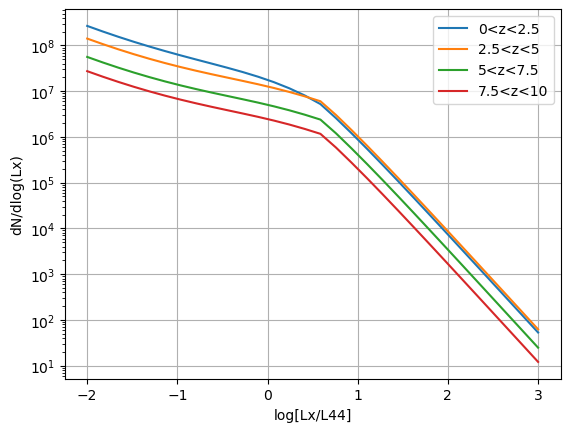

8.375292821268826e-07 1 / (erg Mpc3) 2.1379620895022236e+44 erg / s 2.15 1.1 4.0 -1.5
<function integrandRG at 0x000002E16CB93DC0>


In [28]:


#Plotting
plt.figure(1)
plt.plot(np.log10(x),integral_results_z_1,label = "0<z<2.5")
plt.plot(np.log10(x),(integral_results_z_2),label = "2.5<z<5")
plt.plot(np.log10(x),(integral_results_z_3),label = "5<z<7.5")
plt.plot(np.log10(x),(integral_results_z_4),label = "7.5<z<10")
plt.ylabel("dN/dlog(Lx)")
plt.xlabel("log[Lx/L44]")
#plt.yticks(np.arange(min(integral_results_z_1), max(integral_results_z_4)+1, 1.0))
plt.yscale("log",base =10)
#plt.xlim(0.5)
#plt.ylim(1e1,5e8)
plt.legend()
plt.grid()
plt.show()
print(A,L_star,gamma1,gamma2,v_1, v_2 )

print(integrand)

In [29]:
# running int_lx, here ranges are set to be able to compare with jacobsen et al figure 4
if (selected_model == "AMPLE_Blazar"):
    a1 = 44
    a2 = 46.5
    a3 = 46.5
    a4 = 47.5
    a5 = 47.5
    a6 = 48.5

    print("AMPLE_Blazar")
elif(selected_model == "RG_SLDDE"):
    a1 = 42
    a2 = 43.5
    a3 = 43.5
    a4 = 45
    a5 = 45
    a6 = 47

    print("RG_SLDDE")

elif(selected_model == "AMPLE_FSRQ"):
    a1 = 46
    a2 = 46.75
    a3 = 46.75
    a4 = 47.5
    a5 = 47.5
    a6 = 48.5
    
    print("AMPLE_FSRQ")
else:
    a1 = 44.5
    a2 = 45.5
    a3 = 45.5
    a4 = 46.5
    a5 = 47.5
    a6 = 48.5
    print("APLE_BLlac")
integral_results_lx1=int_lx(Z_list,a1, a2,integrand)
integral_results_lx2=int_lx(Z_list, a3, a4,integrand)
integral_results_lx3=int_lx(Z_list, a5, a6,integrand)

#Blazars

RG_SLDDE


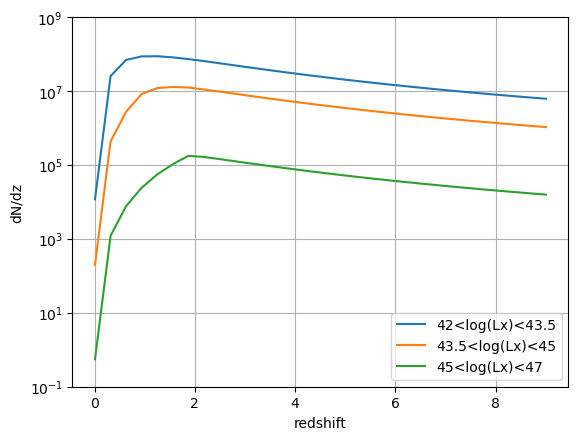

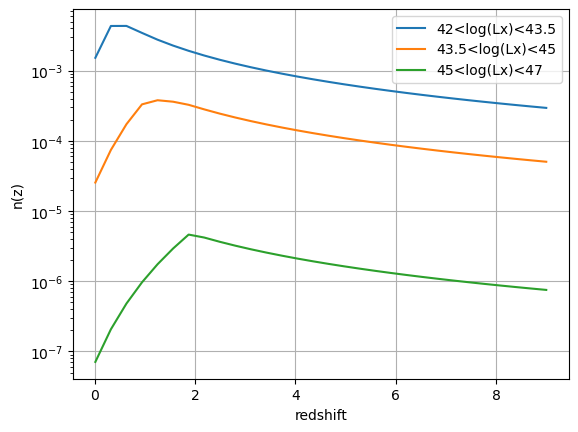

8.375292821268826e-07 1 / (erg Mpc3) 2.1379620895022236e+44 erg / s 2.15 1.1 4.0 -1.5
<function integrandRG at 0x000002E16CB93DC0>


In [30]:
#Plotting

plt.figure(2)
plt.plot(Z_list,(integral_results_lx1),label = f"{a1}<log(Lx)<{a2}")
plt.plot(Z_list,(integral_results_lx2),label = f"{a3}<log(Lx)<{a4}")
plt.plot(Z_list,(integral_results_lx3),label = f"{a5}<log(Lx)<{a6}")
plt.ylabel("dN/dz")
plt.xlabel("redshift")
plt.yscale('log',base=10)
#plt.xscale('log',base=10)
plt.ylim(10**(-1),10**(9))
#plt.xlim(10**(-2),10**(2))
plt.legend()
plt.grid()
plt.show()


n_z_1 =(integral_results_lx1)/cosmo1.differential_comoving_volume(Z_list).value

n_z_2 = (integral_results_lx2)/cosmo1.differential_comoving_volume(Z_list).value
n_z_3 = (integral_results_lx3)/cosmo1.differential_comoving_volume(Z_list).value
plt.figure(2)
plt.plot(Z_list,(integral_results_lx1)/cosmo1.differential_comoving_volume(Z_list).value,label = f"{a1}<log(Lx)<{a2}")
plt.plot(Z_list,(integral_results_lx2)/cosmo1.differential_comoving_volume(Z_list).value,label = f"{a3}<log(Lx)<{a4}")
plt.plot(Z_list,(integral_results_lx3)/cosmo1.differential_comoving_volume(Z_list).value,label = f"{a5}<log(Lx)<{a6}")
plt.ylabel("n(z)")
plt.xlabel("redshift")
plt.yscale('log',base=10)
#plt.xscale('log',base=10)
#plt.ylim(10**(-1),10**(9))
#plt.xlim(10**(-2),10**(2))
plt.legend()
plt.grid()
plt.show()



print(A,L_star,gamma1,gamma2,v_1, v_2 )

print(integrand)

In [31]:
##Emissivity j(z) of  my population j(z) = |<L(z)>| * n(z). Can start by setting |<L(z)>| = the average of my bin
n_1 = (integral_results_lx1)/cosmo1.differential_comoving_volume(Z_list)/u.sr
n_2 = (integral_results_lx2)/cosmo1.differential_comoving_volume(Z_list)/u.sr
n_3 = (integral_results_lx3)/cosmo1.differential_comoving_volume(Z_list)/u.sr




def em_j(z,L_x,n,lowerlim,upperlim):
    tot_lx = 0
    num = 0
    L_x_bin = L_x[L_x>lowerlim]
    L_x_bin = L_x_bin[L_x_bin<upperlim]
  
    tot_N = 0
    for i in range(len(L_x_bin)):
        tot_lx += A.value*corr_fac*L_x_bin[i] * integrand(z, L_x_bin[i])
        num += A.value*corr_fac * integrand(z, L_x_bin[i])
        #print(integrand(z, L_x[i])*A.value)

    #print(tot_lx/num*n[Z_list ==z])
    #print(tot_lx/num)
    return tot_lx/num*n[Z_list ==z]

#print(L_x)

em_j1 = []
em_j2 = []
em_j3 = []
for z in Z_list:
    
    em_j1.append(em_j(z,L_x,n_1,10**a1*u.erg/u.s,10**a2*u.erg/u.s))
    em_j2.append(em_j(z,L_x,n_2,10**a3*u.erg/u.s,10**a4*u.erg/u.s))
    em_j3.append(em_j(z,L_x,n_3,0**a5*u.erg/u.s,10**a6*u.erg/u.s))


print(em_j1)   

[<Quantity [5.69326849e+39] erg / (Mpc3 s)>, <Quantity [1.61747034e+40] erg / (Mpc3 s)>, <Quantity [2.27735007e+40] erg / (Mpc3 s)>, <Quantity [1.98772026e+40] erg / (Mpc3 s)>, <Quantity [1.59141733e+40] erg / (Mpc3 s)>, <Quantity [1.31128747e+40] erg / (Mpc3 s)>, <Quantity [1.10467624e+40] erg / (Mpc3 s)>, <Quantity [9.47146544e+39] erg / (Mpc3 s)>, <Quantity [8.23796075e+39] erg / (Mpc3 s)>, <Quantity [7.2507422e+39] erg / (Mpc3 s)>, <Quantity [6.44607162e+39] erg / (Mpc3 s)>, <Quantity [5.77995497e+39] erg / (Mpc3 s)>, <Quantity [5.22114973e+39] erg / (Mpc3 s)>, <Quantity [4.74692155e+39] erg / (Mpc3 s)>, <Quantity [4.34037433e+39] erg / (Mpc3 s)>, <Quantity [3.98871689e+39] erg / (Mpc3 s)>, <Quantity [3.68210664e+39] erg / (Mpc3 s)>, <Quantity [3.41285937e+39] erg / (Mpc3 s)>, <Quantity [3.17489771e+39] erg / (Mpc3 s)>, <Quantity [2.96335869e+39] erg / (Mpc3 s)>, <Quantity [2.77430984e+39] erg / (Mpc3 s)>, <Quantity [2.6045404e+39] erg / (Mpc3 s)>, <Quantity [2.45140584e+39] erg / 

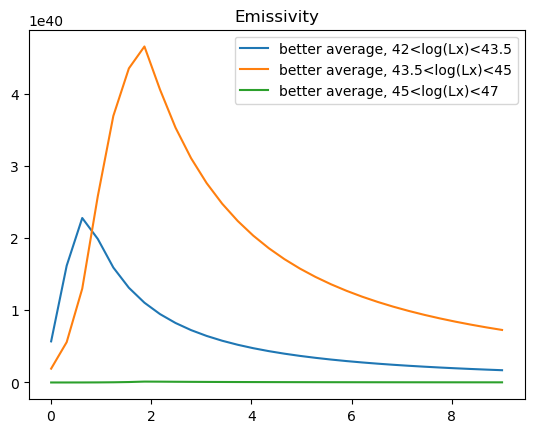

In [32]:
plt.figure(1)
plt.plot(Z_list, em_j1,label = "better average, "+ f"{a1}<log(Lx)<{a2}")
#plt.plot(Z_list,(10**a2+10**a1)/2*n_z_1,label ="average Lx, "+ f"{a1}<log(Lx)<{a2}")
plt.plot(Z_list, em_j2,label = "better average, "+ f"{a3}<log(Lx)<{a4}")
#plt.plot(Z_list,(10**a4+10**a3)/2*n_z_2,label ="average Lx, "+ f"{a3}<log(Lx)<{a4}")
plt.plot(Z_list, em_j3,label = "better average, "+ f"{a5}<log(Lx)<{a6}")
#plt.plot(Z_list,(10**a6+10**a5)/2*n_z_3,label ="average Lx, "+ f"{a5}<log(Lx)<{a6}")
plt.legend()
plt.title("Emissivity")
plt.show()

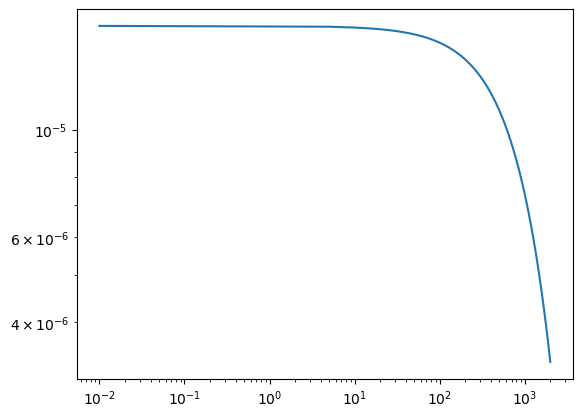

In [33]:
def ICECUBE(E_v, E_cut,gamma,phi_cut):
    return phi_cut*(E_v/100)**(-gamma)*np.exp(-(E_v/E_cut))


E_cut = 1250
gamma = 2
phi_cut = 1.64
E_v_list = np.linspace(0.01,2000,400)
plt.figure()
plt.plot(E_v_list,E_v_list**2*ICECUBE(E_v_list, E_cut,gamma,phi_cut)/1e9)
plt.yscale('log',base=10)
plt.xscale('log',base=10)
plt.show()

In [34]:
def neutrino_flux(z,n):
    return n/(cosmo.luminosity_distance(z)**2)*cosmo1.differential_comoving_volume(z)*u.sr*u.Mpc**2



In [19]:
f_j1 = []
f_j2 = []
f_j3 = []
for i in range(len(Z_list)):
    
    f_j1.append(neutrino_flux(Z_list[i],n_1[i]))
    f_j2.append(neutrino_flux(Z_list[i],n_2[i]))
    f_j3.append(neutrino_flux(Z_list[i],n_3[i]))

print(f_j1)

[<Quantity 0.75835601>, <Quantity 0.58966709>, <Quantity 0.36553829>, <Quantity 0.22575425>, <Quantity 0.14409429>, <Quantity 0.09555792>, <Quantity 0.0656853>, <Quantity 0.04660727>, <Quantity 0.03399561>, <Quantity 0.02539793>, <Quantity 0.01937601>, <Quantity 0.01505701>, <Quantity 0.01189393>, <Quantity 0.00953378>, <Quantity 0.00774281>, <Quantity 0.00636266>, <Quantity 0.00528393>, <Quantity 0.0044297>, <Quantity 0.00374507>, <Quantity 0.00319029>, <Quantity 0.00273618>, <Quantity 0.00236105>, <Quantity 0.00204859>, <Quantity 0.00178633>, <Quantity 0.00156468>, <Quantity 0.00137614>, <Quantity 0.00121481>, <Quantity 0.00107596>, <Quantity 0.00095581>, <Quantity 0.00085129>]


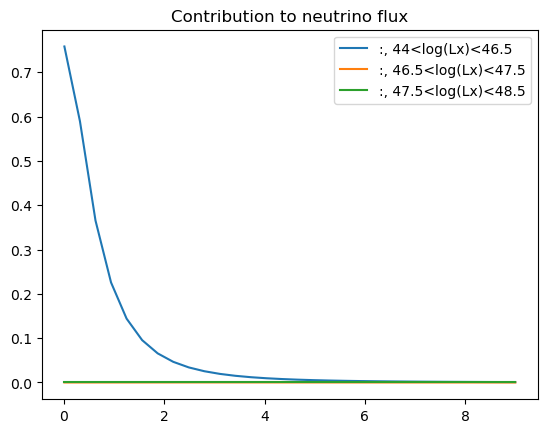

In [20]:
plt.figure(1)
plt.plot(Z_list, f_j1,label = ":, "+ f"{a1}<log(Lx)<{a2}")
plt.plot(Z_list, f_j2,label = ":, "+ f"{a3}<log(Lx)<{a4}")
plt.plot(Z_list, f_j3,label = ":, "+ f"{a5}<log(Lx)<{a6}")
plt.legend()
plt.title("Contribution to neutrino flux")
plt.show()

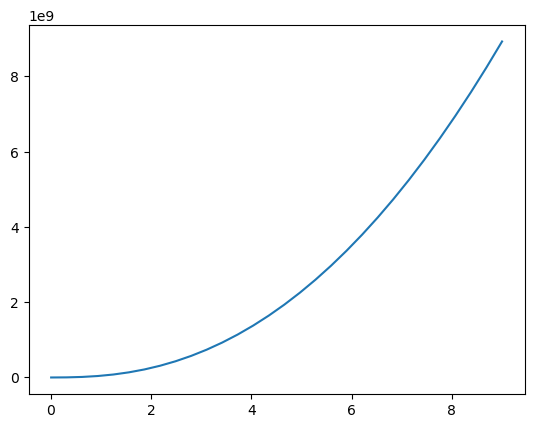

In [21]:
plt.figure(1)
plt.plot(Z_list, cosmo.luminosity_distance(Z_list)**2)
plt.show()

In [22]:
def AGN_neutrino_LF(phi_agn,n,dz,E_v):
    
    
    return phi_agn*n*dz*E_v**2


#def phi_agn(phi_)





In [23]:
#KT model

def phi_Cen_A(E_v):
    xi_v = 0.1#fraction of proton energy to neturino energy
    xi_n = 0.5#fraction of proton energy to neturon energy
    eta = 0.04 #<E_v>/<E_n> = 0.04
    E_CR_b = 3*10**8*200 #200MeV
    Xi = E_v/(eta*E_CR_b)
    phi_p_cen_A = 5*10**(-21)
    
    return xi_v/(xi_n*eta**2)*min([Xi,Xi**2])*phi_p_cen_A*E_v/(eta)
    
    

Below not used in code but test area. 

In [24]:


# Replace 'file_path.csv' with the path to your CSV file
data = np.loadtxt('plot-data (1)_blazar_ajello.csv', delimiter=',', skiprows=1)
data = np.loadtxt('plot-data (2).csv', delimiter=',', skiprows=1)
#data2 = np.loadtxt('plot-data (1)new2.csv', delimiter=',', skiprows=1)

print(data[:,1])

[2.28546283e-13 1.09259938e-12 3.35460370e-12 9.99998649e-12
 6.23551015e-11 3.55862197e-10 1.70125428e-09 7.89651931e-09
 2.35393826e-08 4.24819978e-08 1.34339873e-15 1.34339873e-15
 4.00464754e-15 1.51177575e-14 1.65176749e-12 1.42510074e-13
 4.92388263e-11 1.15905157e-10 2.81007651e-10 1.91448111e-10
 6.61473766e-11 3.77504810e-11 8.88624217e-08 8.88624217e-08
 1.60371802e-07 1.60371802e-07 4.12462638e-07 4.12462638e-07
 6.42232542e-07 6.42232542e-07 8.13310925e-07 8.13310925e-07
 1.06081883e-06 1.06081883e-06 2.64896929e-07 2.64896929e-07]


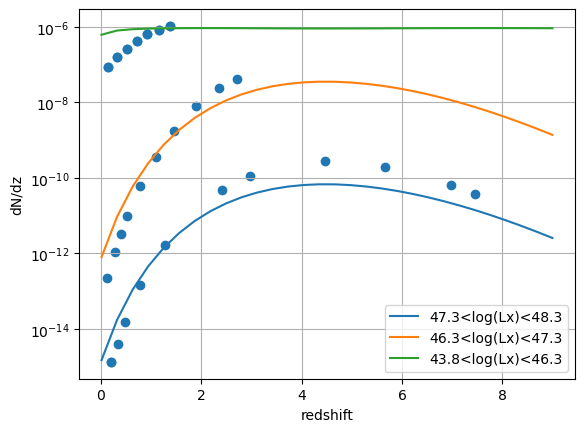

In [25]:
integral_results_lx=int_lx(Z_list,47.3, 48.3,integrand)

integral_results_lx__2=int_lx(Z_list,46.3, 47.3,integrand)
integral_results_lx__3=int_lx(Z_list,43.8, 46.3,integrand)
plt.figure(2)
plt.plot(Z_list,(integral_results_lx)/cosmo1.differential_comoving_volume(Z_list)*u.sr/400,label = f"{47.3}<log(Lx)<{48.3}")
plt.plot(Z_list,(integral_results_lx__2)/cosmo1.differential_comoving_volume(Z_list)*u.sr/400,label = f"{46.3}<log(Lx)<{ 47.3}")
plt.plot(Z_list,(integral_results_lx__3)/cosmo1.differential_comoving_volume(Z_list)*u.sr/400,label = f"{43.8}<log(Lx)<{ 46.3}")
plt.scatter(data[:,0],data[:,1])
#plt.scatter(data2[:,0],data2[:,1])
plt.plot()
plt.ylabel("dN/dz")
plt.xlabel("redshift")
plt.yscale('log',base=10)
#plt.xscale('log',base=10)
#plt.ylim(10**(-1),10**(9))
#plt.xlim(10**(-2),10**(2))
plt.legend()
plt.grid()
plt.show()

In [173]:
H0 = 70.0  # Hubble constant in km/s/Mpc
Om0 = 0.3  # Matter density parameter (ΩM)
Ode0 = 0.7  # Dark energy density parameter (ΩΛ)

# Create a FlatLambdaCDM cosmology object
cosmo1 = FlatLambdaCDM(H0=H0, Om0=Om0)  
c = const.c.value
print(c)
def omega(z):
    om = 1
    omz = Om0 * (1 + z)**3
    a = 16*np.pi*(c/H0)**3*(omz+(om-2)*(np.sqrt(1+omz)-1))**2/(om**4*(1+z)**3*np.sqrt(1+omz))
    return a
print(omega(1))

299792458.0
6.481543512563635e+20


In [174]:
c = 3.0e8  # Speed of light in km/s
H0 = 70.0  # Hubble constant in km/s/Mpc
Omega_Lambda = 0.7  # Dark energy density parameter
Omega_M = 0.3  # Matter density parameter

def calculate_dVc_dz(z):
    # Calculate the density parameter for matter at redshift z
    Omega_z = Omega_M * (1 + z)**3

    # Calculate the deceleration parameter
    q = 0.5 * Omega_M - Omega_Lambda

    # Calculate dVc/dz using the formula
    dVc_dz = (c / H0) * (1 / np.sqrt(1 + z)) * (
        1 + z + (1 / 2) * (1 - q) * z - (1 / 6) * (1 - q - 3 * q**2 + 3 * q**3) * z**2
    )

    return dVc_dz

# Example usage:
redshift = 1.0  # Replace with your desired redshift
volume_element = calculate_dVc_dz(redshift)
print(volume_element)
print(cosmo1.differential_comoving_volume(1)*4*np.pi)
print((cosmo1.comoving_volume(1.1)-cosmo1.comoving_volume(0.9))/0.2)



H0 = 70.0  # Hubble constant in km/s/Mpc
Omega_m = 0.3  # Matter density parameter
Omega_lambda = 0.7  # Dark energy density parameter

# Define a redshift range over which you want to calculate dV
z_min = 0.1
z_max = 1.0
num_points = 1000
z_values = np.linspace(z_min, z_max, num_points)

# Calculate the comoving radial distance r(z)
def comoving_distance(z):
    c = 299792.458  # Speed of light in km/s
    integral = lambda x: 1.0 / np.sqrt(Omega_m * (1 + x)**3 + Omega_lambda)
    result, _ = quad(integral, 0, z)
    return c * result / H0

# Calculate dV for each redshift in the specified range
dV_values = []

dV_values = []

for z in z_values:
    r = comoving_distance(z)
    dOmega = 4.0 * np.pi  # Solid angle element for the entire sky
    dV = r**2 * dOmega
    dV_values.append(dV)
print((dV_values[-1]-dV_values[-2])/0.002)

8337104.622859566
333646636371.48804 Mpc3 / sr
333063950745.45636 Mpc3
90973676.30840838


In [32]:
def function1(x):
    return x**2
    
a = 10/u.erg/u.Mpc
c = a*quad(lambda z: function1(z), z_lower, z_upper)[0]
print(a*quad(lambda z: function1(z), z_lower, z_upper)[0])

d = []
d.append(c.value)
print(d)
#plt.scatter(z_lower,c)

plt.plot(x,integral_results_z_1*1*(u.erg*u.Mpc**3))
print(len(integral_results_z_1[:]))

52.08333333333332 1 / (erg Mpc)
[52.08333333333332]


UnitConversionError: '' (dimensionless) and 'erg Mpc3' are not convertible

In [35]:


print(z_lower)
def trap(f, n,z_lower,z_higher,Lx):
    h = (z_higher-z_lower) / float(n)
   
    intgr = 0.5 * h * (f(z_lower,Lx) + f(z_upper,Lx))
    for i in range(1, int(n)+1):
        intgr = intgr + h * f(i * h,Lx)

    return intgr
 
def simpsons(a, b, n,f,Lx):
    """
    simpson's rule numerical integral implementation
    a: interval start
    b: interval end
    n: number of steps
    return: numerical integral evaluation
    """

    # calculate number of steps
    h = (b - a)/float(n)

    # start at a
    
    x = h*0
    # store f(x) evaluation at start and end
    res = f(x,Lx)
    res += f(b,Lx)

    # sum [2*yi (i is even), 4*yi (i is odd)]
    for i in range(1, int(n)+1):
        x = h*i
        
        res += 2 * f(x,Lx) if i % 2 == 0 else 4 * f(x,Lx)

    # divide h by 3 and multiply for final result
    return (h / 3) * res

trap_method = []
simp_method = []

for Lx in L_x:
    
    integr = trap(integrand, 200,z_lower,z_upper,Lx)
    integrS = simpsons(z_lower,z_upper,200,integrand,Lx)
    trap_method.append(A.value*corr_fac*integr.value)
    simp_method.append(A.value*corr_fac*integrS)


    
print(trap_method)  
print(integral_results_z_1)


0.0
[<Quantity 15151469.74821646>, <Quantity 9272058.29803183>, <Quantity 5656151.36498821>, <Quantity 3450371.443218>, <Quantity 2104799.24031616>, <Quantity 1283971.86069442>, <Quantity 783249.87365895>, <Quantity 477798.9170689>, <Quantity 291467.40118292>, <Quantity 177801.25261371>, <Quantity 108462.50833782>, <Quantity 66164.41415342>, <Quantity 40361.68596277>, <Quantity 24621.47839744>, <Quantity 15019.62031602>, <Quantity 9162.28468478>, <Quantity 5589.1866025>, <Quantity 3409.52152791>, <Quantity 2079.87993174>, <Quantity 1268.77055769>, <Quantity 773.97675871>, <Quantity 472.14212167>, <Quantity 288.01663687>, <Quantity 175.69621371>, <Quantity 107.17839028>, <Quantity 65.3810751>, <Quantity 39.88383264>, <Quantity 24.32997781>, <Quantity 14.84179882>, <Quantity 9.05380983>]
[<Quantity 14829160.39840078>, <Quantity 9068189.21624498>, <Quantity 5531786.79493495>, <Quantity 3374506.43654069>, <Quantity 2058519.98863303>, <Quantity 1255740.54259198>, <Quantity 766028.17510474>,

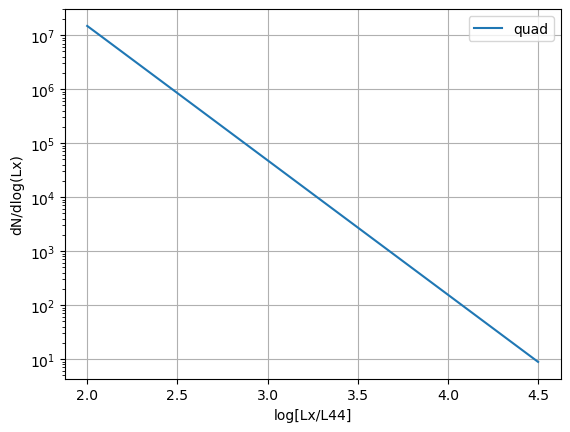

In [38]:
p = 0
b = simp_method[0]/4e5/30

plt.figure(1)
plt.plot(np.log10(x)[p:],integral_results_z_1[p:],label = "quad")
#plt.plot(np.log10(x)[p:],trap_method[p:],label = "trap")
#plt.plot(np.log10(x)[p:],simp_method[p:],label = "simp")
plt.ylabel("dN/dlog(Lx)")
plt.xlabel("log[Lx/L44]")
#plt.yticks(np.arange(min(integral_results_z_1), max(integral_results_z_4)+1, 1.0))
plt.yscale("log",base =10)
#plt.ylim(1e1,5e8)
plt.legend()
plt.grid()
plt.show()


In [106]:
print(b)
print(1/b)

0.020190757558680713
49.52761168538052


In [92]:
print(60*60)

3600


In [ ]:
#neturino fluc calc 

In [55]:
#constants, The Becker & Biermann (BB) model

A_vBB = 1.4 *10**(-10)

def phi_BB(E_nu, E_max, alpha, A_vBB):
    return A_vBB*E_nu**(-alpha )*np.exp(-E_nu/E_max)

def phi_BB1(Lx):
    return (Lx/(3.87*10**(44)*u.erg/u.s))**(1.43)


def phi_BB2(Lx):
    return (Lx/(1.04*10**(43)))**(1.27)
    
E_max = 10**10
alpha = 1

E_nu = np.logspace(3,11,100)
print(integral_results_z_1[:])
#print(len(L_x))
phi_mod=np.zeros(len(E_nu))
for j in range(len(E_nu)):
    
    for i in range(len(integral_results_z_1)):
        phi_mod[j] += E_nu[j]**2*phi_BB(E_nu[j],E_max,alpha,A_vBB)*phi_BB1(L_x[i])*(L_x[-1]-L_x[0])



[<Quantity 2.67611514e+08>, <Quantity 2.02200815e+08>, <Quantity 1.54906008e+08>, <Quantity 1.20329432e+08>, <Quantity 94734897.56997615>, <Quantity 75514800.11239725>, <Quantity 60831694.60866389>, <Quantity 49377269.80918097>, <Quantity 40211817.13421496>, <Quantity 32660658.27064145>, <Quantity 26252071.66037062>, <Quantity 20683837.76528047>, <Quantity 15802508.85292652>, <Quantity 11574999.84288806>, <Quantity 8037172.98915413>, <Quantity 5226209.21792812>, <Quantity 2575841.61518397>, <Quantity 1204585.24306261>, <Quantity 548469.01813891>, <Quantity 244735.35053859>, <Quantity 107616.4473848>, <Quantity 46836.0722692>, <Quantity 20239.22446453>, <Quantity 8703.80750199>, <Quantity 3730.90080142>, <Quantity 1595.78935295>, <Quantity 681.57022965>, <Quantity 290.82388999>, <Quantity 124.01509749>, <Quantity 52.86123718>]


TypeError: only dimensionless scalar quantities can be converted to Python scalars

1.3789999999999998e-07
1.8100000000000002e+44
[1.00000000e+44 1.42946134e+44 2.04335972e+44 2.92090372e+44
 4.17531894e+44 5.96845700e+44 8.53167852e+44 1.21957046e+45
 1.74332882e+45 2.49202115e+45 3.56224789e+45 5.09209564e+45
 7.27895384e+45 1.04049831e+46 1.48735211e+46 2.12611233e+46
 3.03919538e+46 4.34441230e+46 6.21016942e+46 8.87719709e+46
 1.26896100e+47 1.81393069e+47 2.59294380e+47 3.70651291e+47
 5.29831691e+47 7.57373918e+47 1.08263673e+48 1.54758735e+48
 2.21221629e+48 3.16227766e+48]


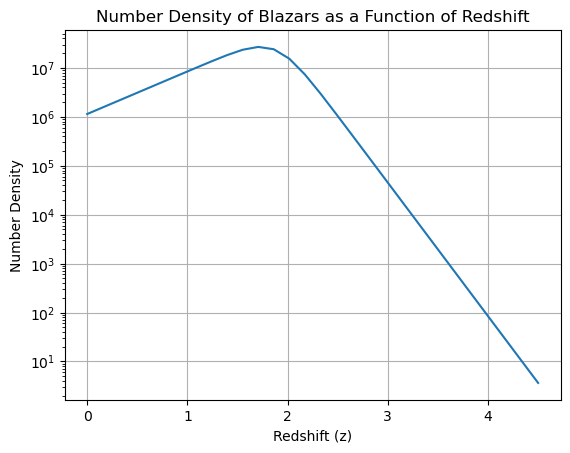

In [89]:
# Define the double power-law function
def luminosity_function(z, A, L_star, Gamma_1, Gamma_2,LX):
    return A * ((LX/e_z_PL(z)/L_star)**Gamma_1 + (LX/e_z_PL(z)/L_star)**Gamma_2)**-1*cosmo1.differential_comoving_volume(z).value

# Parameters from the paper (these are placeholders and should be replaced with actual values)
A = A#.value  # normalization constant
print(A)
L_star = L_star
print(L_star)# break luminosity
Gamma_1 = gamma1.value  # faint end slope
Gamma_2 = gamma2.value  # bright end slope

# Integrate the luminosity function over a range of luminosities to get density as a function of redshift


luminosity_range = (46.5, 47.5)
# from the paper
density_per_redshift = []
redshift_range = np.linspace(5, 7.5, 100)  # example redshift range from 0 to 10
L_xnew = L_x.value
print(L_xnew)
for LX in L_xnew:
    # Here, we assume the LF does not change with redshift. If it does, the function should be modified accordingly.
    density, _ = quad(luminosity_function, redshift_range[0], redshift_range[-1], args=(A, L_star, Gamma_1, Gamma_2,LX))
    density_per_redshift.append(4*np.pi*corr_fac*density)

# Plotting
plt.plot(np.log10(x), density_per_redshift)
plt.xlabel('Redshift (z)')
plt.ylabel('Number Density')
plt.yscale('log',base=10)

plt.title('Number Density of Blazars as a Function of Redshift')
plt.grid(True)
plt.show()